In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('zomato.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df1=pd.read_excel("Country-Code.xlsx")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
# Merge both the dataset

ds=pd.merge(df,df1)
ds.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [5]:
ds.shape

(9551, 22)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
ds.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [8]:
# Lets check if we have duplicates

ds.drop_duplicates()
ds.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [9]:
# lets check if this dataset has null values

ds.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<AxesSubplot:>

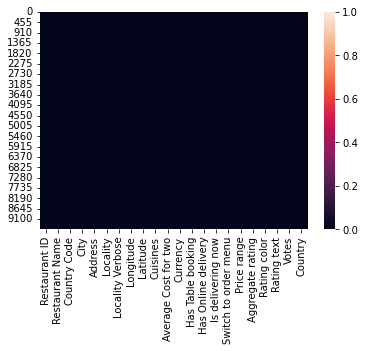

In [10]:
sns.heatmap(ds.isnull())

In [11]:
# Looks like ths dataset has 9 null values in Cuisine column. we can dealwith tis as we proceed ahead

In [12]:
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy="most_frequent")

ds['Cuisines']=imp.fit_transform(ds['Cuisines'].values.reshape(-1,1))
ds


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [13]:
ds.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [14]:
# Now there is no Null Valuesin the dataset

In [15]:
#lets check the Target variable distiribution(Avearge cost for two)

ds['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

In [16]:
# lets scheck if we have any blank space in the dataset

ds.loc[ds['Average Cost for two']== ' ']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


Observation: Lookslike there is no blank space in this dataset

In [17]:
ds['Average Cost for two'].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     35,     20,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

# Data Visualization

In [18]:
ds.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [19]:
# lets seperate the Categorical and Numerical features for etter understnading

In [20]:
categorical_features=[column_name for column_name in ds.columns if ds[column_name].dtype =='object']
ds[categorical_features].isnull().sum()

Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Cuisines                0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Rating color            0
Rating text             0
Country                 0
dtype: int64

In [21]:
# Numerical feature


numerical_features=[column_name for column_name in ds.columns if ds[column_name].dtype !='object']
ds[numerical_features].isnull().sum()

Restaurant ID           0
Country Code            0
Longitude               0
Latitude                0
Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64

<AxesSubplot:>

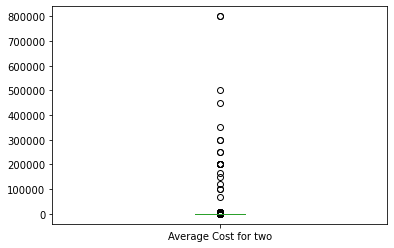

In [22]:
ds['Average Cost for two'].plot.box()

Restaurant ID              AxesSubplot(0.125,0.536818;0.110714x0.343182)
Country Code            AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Longitude               AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Latitude                AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Average Cost for two    AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Price range             AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Aggregate rating              AxesSubplot(0.125,0.125;0.110714x0.343182)
Votes                      AxesSubplot(0.257857,0.125;0.110714x0.343182)
dtype: object

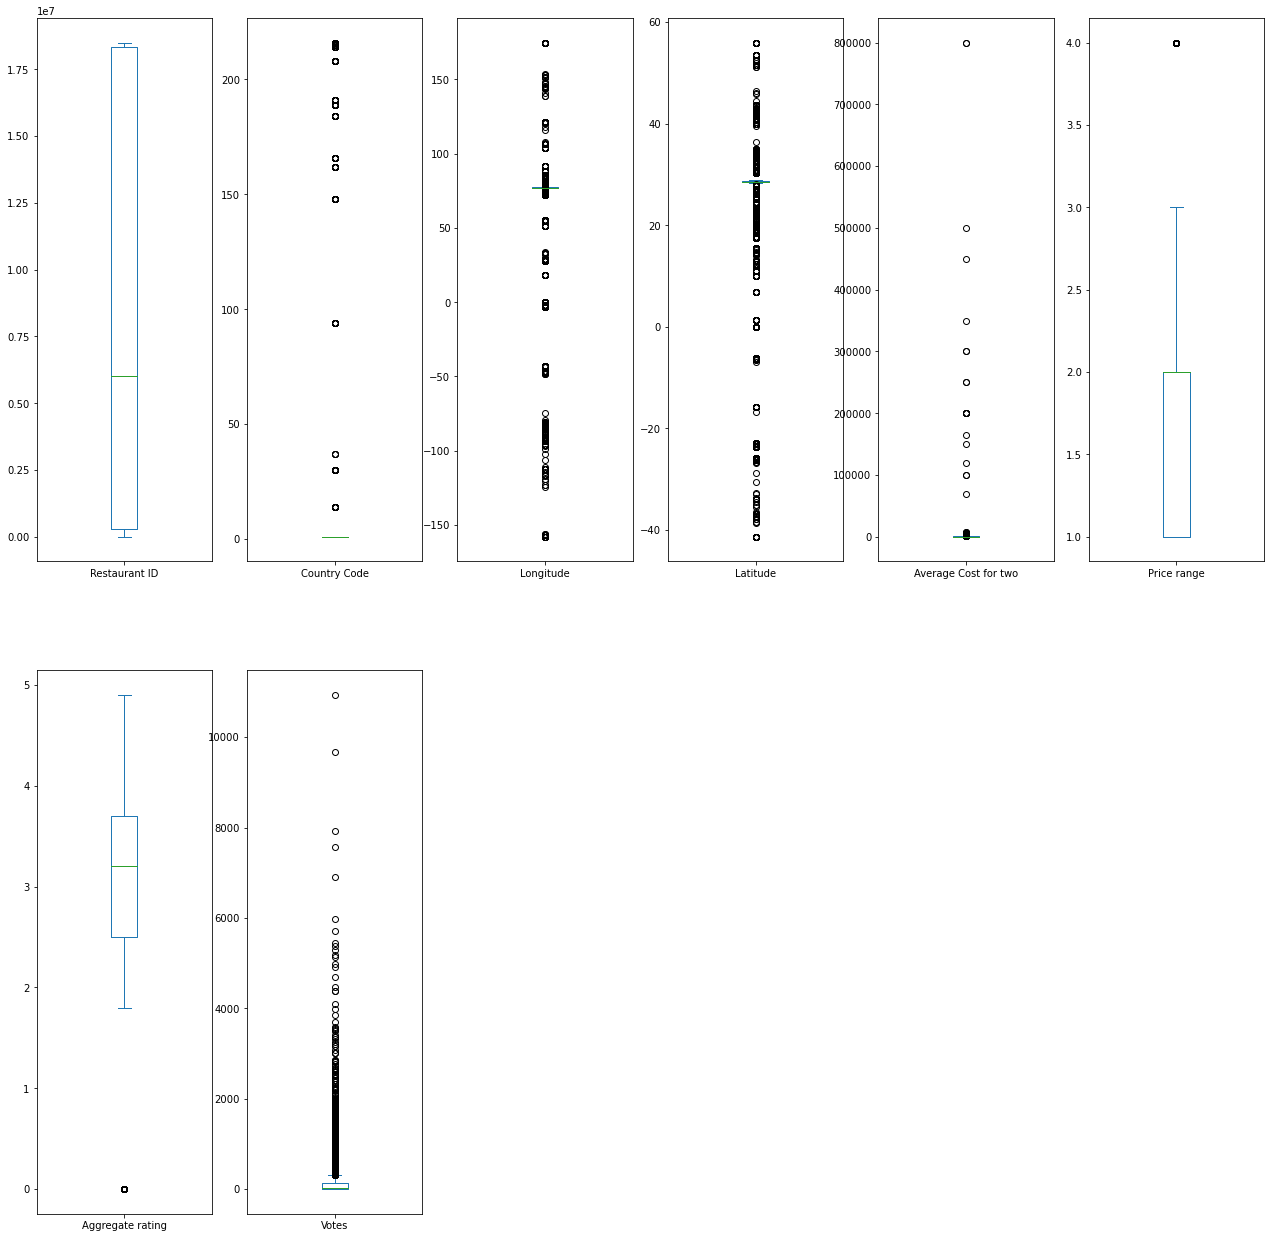

In [23]:
ds.plot(kind='box' , subplots=True, layout=(2,6), figsize=(22,22))

In [24]:
# Observation: As we can see alomost all column shas some outliers present in the dataset. we will handle them accordingly

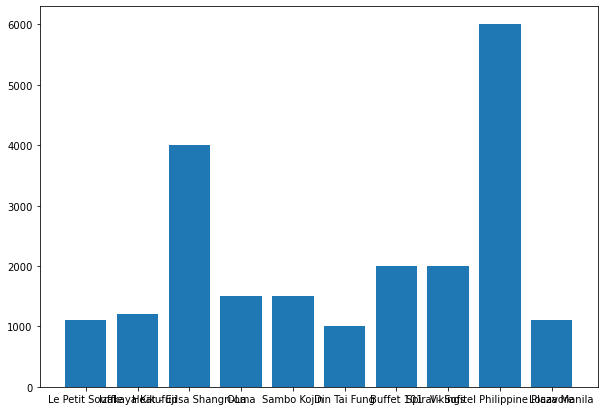

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

name=ds['Restaurant Name'].head(12)
price=ds['Average Cost for two'].head(12)

fig=plt.figure(figsize=(10,7))

plt.bar(name[0:10], price[0:10])

plt.show()

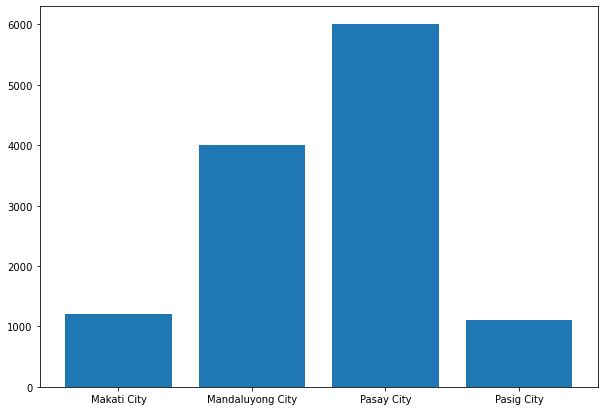

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

name=ds['City'].head(12)
price=ds['Average Cost for two'].head(12)

fig=plt.figure(figsize=(10,7))

plt.bar(name[0:10], price[0:10])

plt.show()

<AxesSubplot:xlabel='Has Table booking', ylabel='count'>

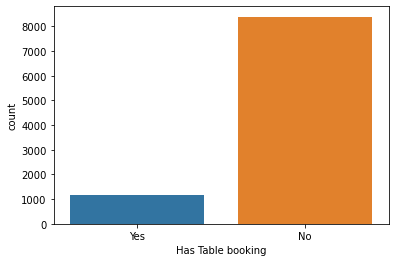

In [27]:
sns.countplot(x='Has Table booking', data=ds)

Text(0.5, 1.0, 'online delivery or not')

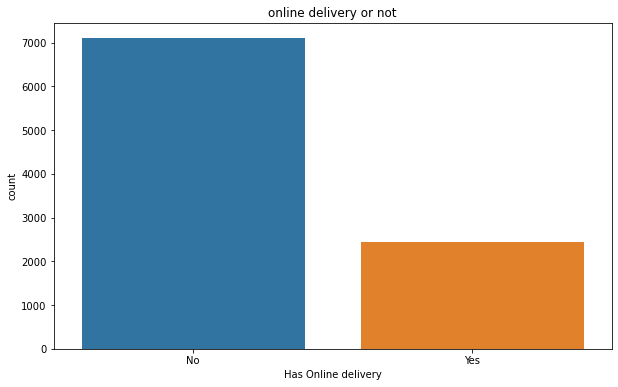

In [28]:
plt.figure(figsize=[10,6])
sns.countplot(x=ds['Has Online delivery'])
plt.title('online delivery or not')

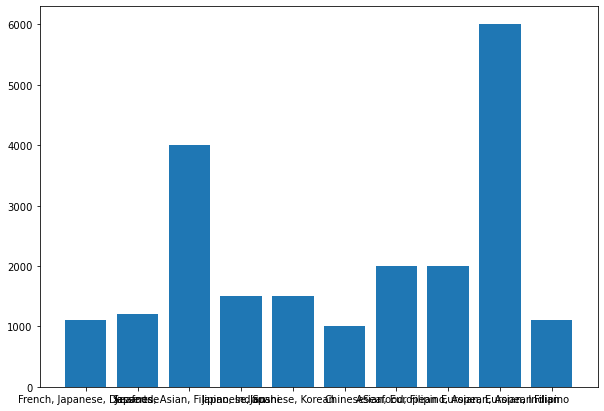

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

name=ds['Cuisines'].head(12)
price=ds['Average Cost for two'].head(12)

fig=plt.figure(figsize=(10,7))

plt.bar(name[0:10], price[0:10])

plt.show()

<AxesSubplot:xlabel='Rating color', ylabel='count'>

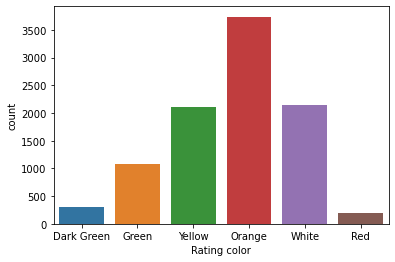

In [30]:
sns.countplot(x='Rating color', data=ds)

<AxesSubplot:xlabel='Rating text', ylabel='count'>

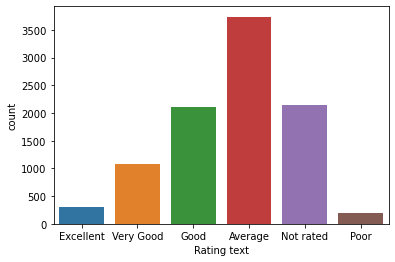

In [31]:
sns.countplot(x='Rating text', data=ds)

<AxesSubplot:xlabel='Country', ylabel='count'>

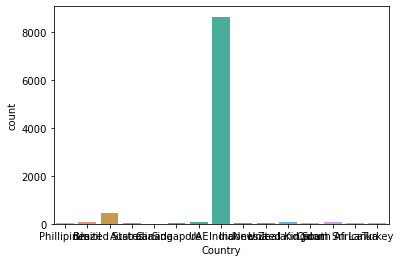

In [32]:
sns.countplot(x='Country', data=ds)

<AxesSubplot:xlabel='Has Online delivery', ylabel='count'>

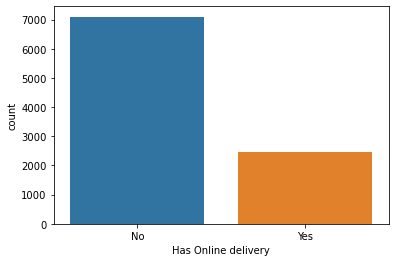

In [33]:
sns.countplot(x='Has Online delivery', data=ds)

<AxesSubplot:xlabel='Average Cost for two', ylabel='count'>

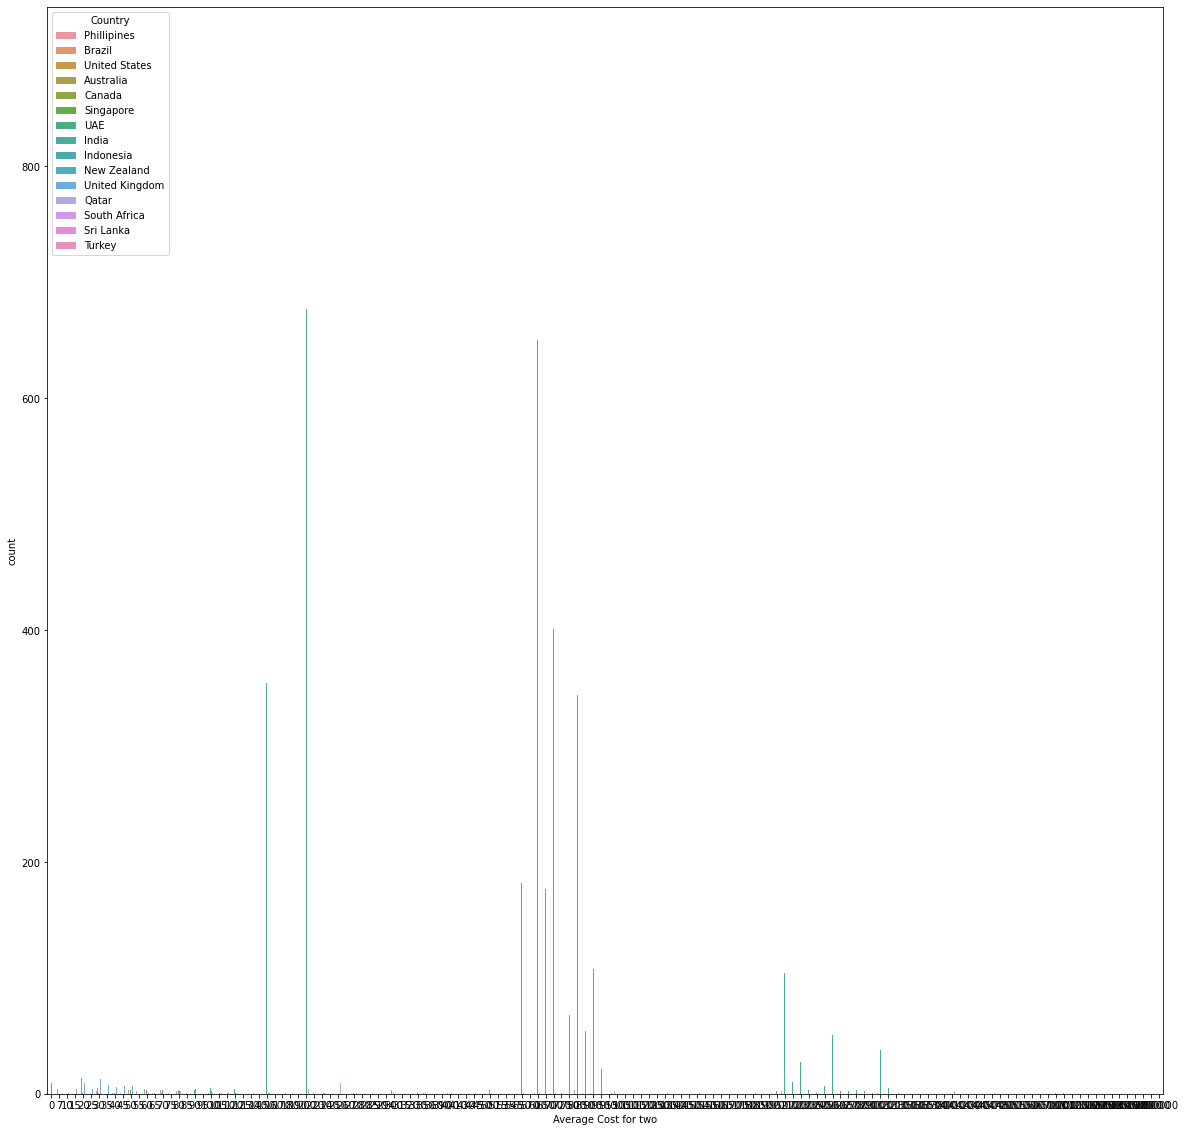

In [34]:
f, ax =plt.subplots(figsize=(20,20))
sns.countplot(x='Average Cost for two', hue='Country', data=ds)

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

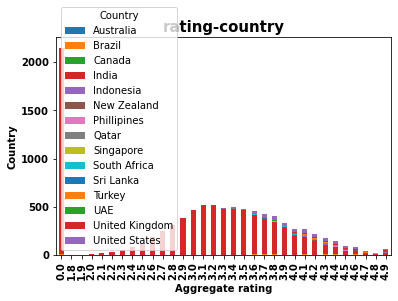

In [35]:
# Checking relation bewteen Aggregate rating and country 

type_plt=pd.crosstab(ds['Aggregate rating'], ds['Country'])
type_plt.plot(kind='bar', stacked =True)
plt.title('rating-country', fontsize=15, fontweight='bold')
plt.ylabel('Country', fontsize=10,  fontweight='bold')
plt.xlabel('Aggregate rating', fontsize=10, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

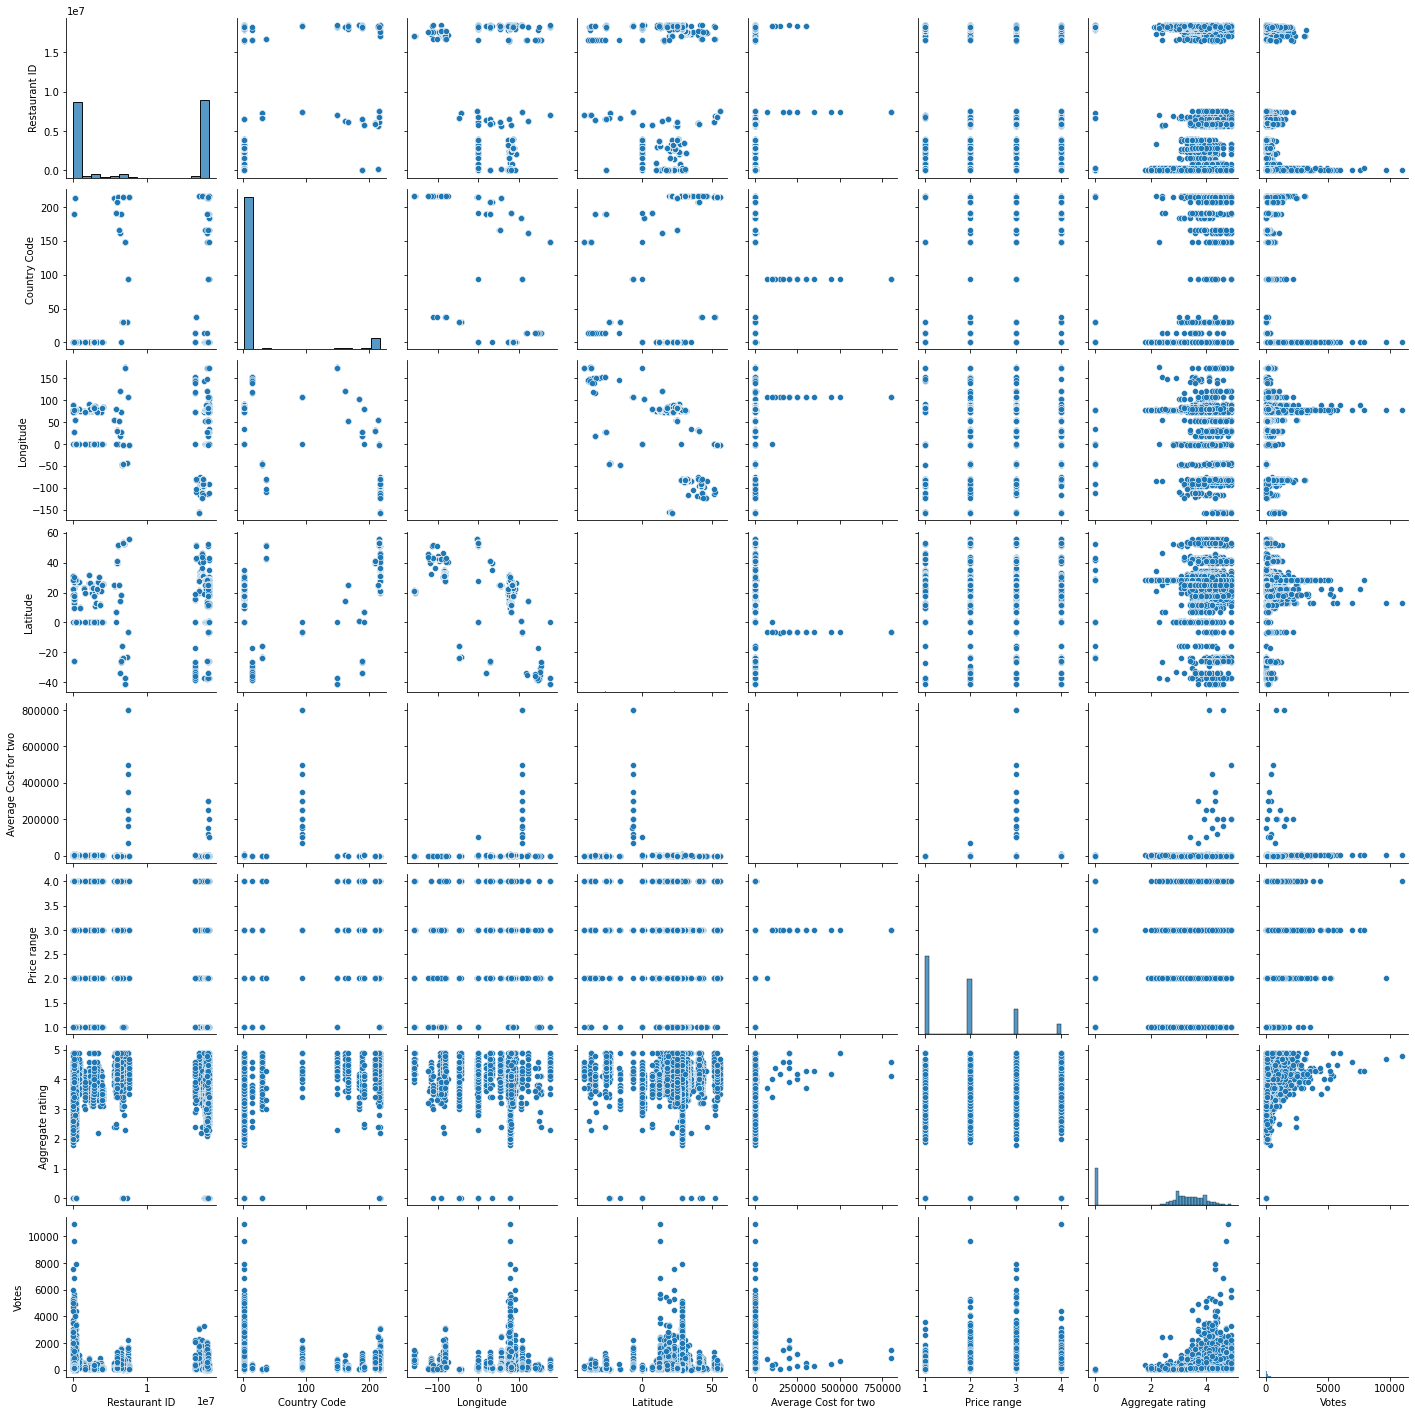

In [36]:
sns.pairplot(ds)

In [37]:
ds.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [38]:
# Deleting unnecessary columns

ds1=ds.drop(columns=['Address','Locality','Locality Verbose','Longitude','Latitude','Rating text','Restaurant ID'],axis=1)

In [39]:
ds1.head(5)

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country
0,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,270,Phillipines
3,Ooma,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,229,Phillipines


In [40]:
# LabelEncoding

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
ds1[['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery','Is delivering now', 'Switch to order menu', 'Rating color','Country']] = ds1[['Restaurant Name', 'City', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery','Is delivering now', 'Switch to order menu', 'Rating color','Country']].apply(LabelEncoder().fit_transform)

print(ds1)

      Restaurant Name  Country Code  City  Cuisines  Average Cost for two  \
0                3749           162    73       920                  1100   
1                3173           162    73      1111                  1200   
2                2897           162    75      1671                  4000   
3                4707           162    75      1126                  1500   
4                5523           162    75      1122                  1500   
...               ...           ...   ...       ...                   ...   
9546             4443           208   140      1813                    80   
9547             1311           208   140      1824                   105   
9548             3069           208   140      1110                   170   
9549              513           208   140      1657                   120   
9550             7240           208   140       331                    55   

      Currency  Has Table booking  Has Online delivery  Is delivering now  

In [43]:
ds1.head(5)

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country
0,3749,162,73,920,1100,0,1,0,0,0,3,4.8,0,314,6
1,3173,162,73,1111,1200,0,1,0,0,0,3,4.5,0,591,6
2,2897,162,75,1671,4000,0,1,0,0,0,4,4.4,1,270,6
3,4707,162,75,1126,1500,0,0,0,0,0,4,4.9,0,365,6
4,5523,162,75,1122,1500,0,1,0,0,0,4,4.8,0,229,6


In [44]:
# Lets check Correlation

ds1.corr()

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country
Restaurant Name,1.000000,0.020013,-0.001400,0.051680,0.019241,0.009669,0.041174,0.028081,0.011984,NaN,0.061275,0.029367,-0.007312,0.018512,0.017561
Country Code,0.020013,1.000000,-0.181728,-0.132902,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,NaN,0.243327,0.282189,-0.187174,0.154530,0.968700
City,-0.001400,-0.181728,1.000000,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,NaN,-0.105759,-0.132163,0.110887,-0.078406,-0.180959
Cuisines,0.051680,-0.132902,0.026614,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,NaN,-0.005350,-0.080331,-0.016228,-0.032719,-0.127955
Average Cost for two,0.019241,0.043225,-0.028838,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,NaN,0.075083,0.051792,-0.049970,0.067783,-0.004034
Currency,0.009669,-0.033466,-0.071996,0.068912,0.045615,1.000000,0.000640,0.006991,0.001458,NaN,0.075179,-0.006939,-0.040430,-0.027111,-0.105296
Has Table booking,0.041174,-0.061682,-0.003762,0.050639,0.007758,0.000640,1.000000,0.101224,-0.016816,NaN,0.501925,0.189998,-0.021365,0.169422,-0.062076
Has Online delivery,0.028081,-0.154605,0.012723,-0.016639,-0.018974,0.006991,0.101224,1.000000,0.101730,NaN,0.077918,0.225699,0.011477,0.074303,-0.140464
Is delivering now,0.011984,-0.018291,-0.014039,0.007773,-0.001862,0.001458,-0.016816,0.101730,1.000000,NaN,0.010940,0.019180,0.001886,-0.001124,-0.016607
Switch to order menu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
ds1.corr()['Aggregate rating'].sort_values()

Rating color           -0.367054
City                   -0.132163
Cuisines               -0.080331
Currency               -0.006939
Is delivering now       0.019180
Restaurant Name         0.029367
Average Cost for two    0.051792
Has Table booking       0.189998
Has Online delivery     0.225699
Country                 0.255591
Country Code            0.282189
Votes                   0.313691
Price range             0.437944
Aggregate rating        1.000000
Switch to order menu         NaN
Name: Aggregate rating, dtype: float64

<AxesSubplot:>

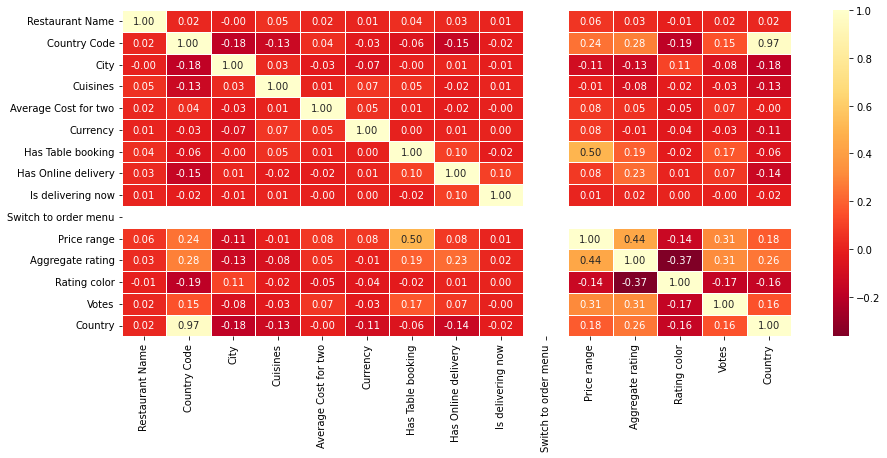

In [46]:
plt.figure(figsize=(15,6))
sns.heatmap(ds1.corr(),cmap= 'YlOrRd_r', linewidth=0.5, annot=True, fmt='.2f')

In [47]:
# Summary Statistics

ds1.describe()
round(ds1.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
Restaurant Name,3653.20,2142.92,0.0,1777.5,3595.0,5485.5,7445.0
Country Code,18.37,56.75,1.0,1.0,1.0,1.0,216.0
City,78.30,23.20,0.0,76.0,88.0,88.0,140.0
Cuisines,989.46,514.18,0.0,497.0,1127.0,1353.5,1824.0
Average Cost for two,1199.21,16121.18,0.0,250.0,400.0,700.0,800000.0
Currency,3.98,0.91,0.0,4.0,4.0,4.0,11.0
Has Table booking,0.12,0.33,0.0,0.0,0.0,0.0,1.0
Has Online delivery,0.26,0.44,0.0,0.0,0.0,1.0,1.0
Is delivering now,0.00,0.06,0.0,0.0,0.0,0.0,1.0
Switch to order menu,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [48]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9551 non-null   int32  
 1   Country Code          9551 non-null   int64  
 2   City                  9551 non-null   int32  
 3   Cuisines              9551 non-null   int32  
 4   Average Cost for two  9551 non-null   int64  
 5   Currency              9551 non-null   int32  
 6   Has Table booking     9551 non-null   int32  
 7   Has Online delivery   9551 non-null   int32  
 8   Is delivering now     9551 non-null   int32  
 9   Switch to order menu  9551 non-null   int32  
 10  Price range           9551 non-null   int64  
 11  Aggregate rating      9551 non-null   float64
 12  Rating color          9551 non-null   int32  
 13  Votes                 9551 non-null   int64  
 14  Country               9551 non-null   int32  
dtypes: float64(1), int32(

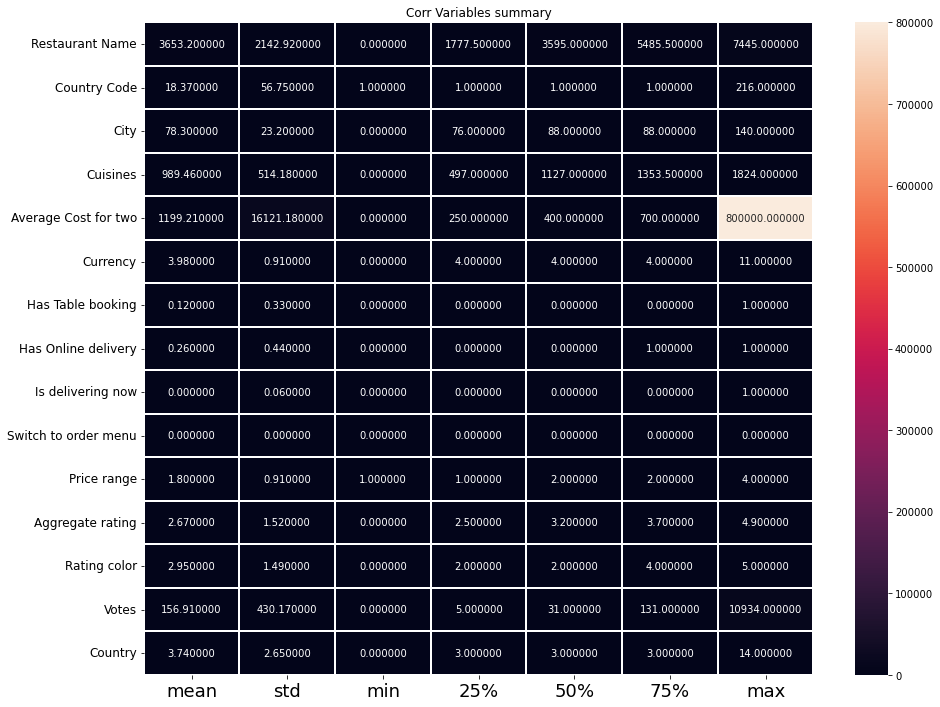

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(round(ds1.describe()[1:].transpose(),2), linewidth=2, annot=True, fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Corr Variables summary')
plt.savefig('heatmap.png')
plt.show()

In [50]:
# Check skewness

ds1.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Cuisines                -0.307425
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Switch to order menu     0.000000
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Votes                    8.807637
Country                  3.312721
dtype: float64

In [51]:
# Normal Distribution Curve

<AxesSubplot:xlabel='City', ylabel='Density'>

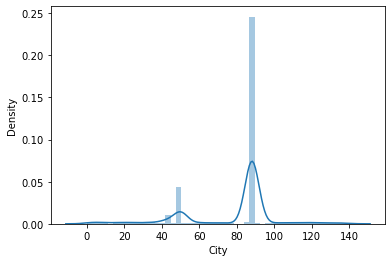

In [52]:
sns.distplot(ds1['City'])

<AxesSubplot:xlabel='Cuisines', ylabel='Density'>

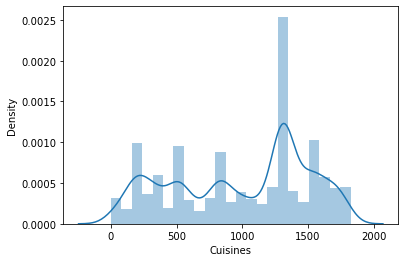

In [53]:
sns.distplot(ds1['Cuisines'])

<AxesSubplot:xlabel='Aggregate rating', ylabel='Density'>

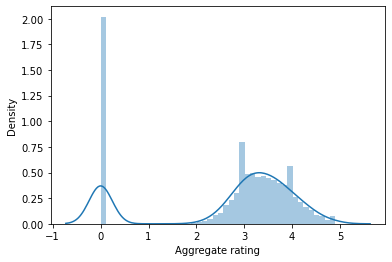

In [54]:
sns.distplot(ds1['Aggregate rating'])

<AxesSubplot:xlabel='Average Cost for two', ylabel='Density'>

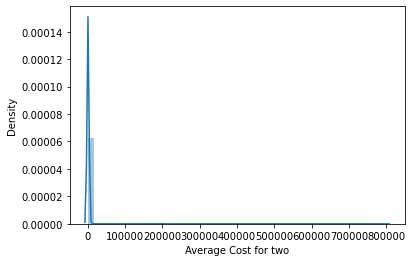

In [55]:
sns.distplot(ds1['Average Cost for two'])

<AxesSubplot:xlabel='Is delivering now', ylabel='Density'>

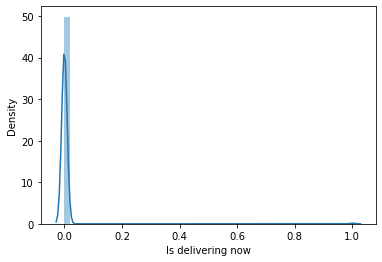

In [56]:
sns.distplot(ds1['Is delivering now'])

<AxesSubplot:xlabel='Votes', ylabel='Density'>

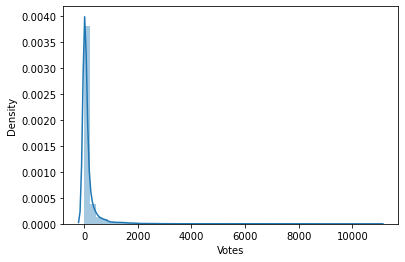

In [57]:
sns.distplot(ds1['Votes'])

<AxesSubplot:xlabel='Country', ylabel='Density'>

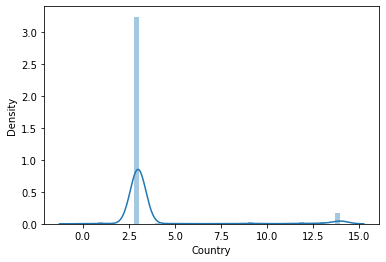

In [58]:
sns.distplot(ds1['Country'])

In [59]:
# Observation: The Normal distribution curve shows that the Data is skewed. We will handel it in next steps

# Remove Outliers

In [60]:
from scipy.stats import zscore

In [61]:
zscore(ds1)

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country
0,0.044706,2.531111,-0.228533,-0.135100,-0.006154,-4.351046,2.692181,-0.587547,-0.059771,NaN,1.319803,1.407131,-1.977859,0.365202,0.853457
1,-0.224101,2.531111,-0.228533,0.236387,0.000049,-4.351046,2.692181,-0.587547,-0.059771,NaN,1.319803,1.209281,-1.977859,1.009168,0.853457
2,-0.352904,2.531111,-0.142317,1.325565,0.173743,-4.351046,2.692181,-0.587547,-0.059771,NaN,2.424090,1.143331,-1.308053,0.262911,0.853457
3,0.491783,2.531111,-0.142317,0.265562,0.018659,-4.351046,-0.371446,-0.587547,-0.059771,NaN,2.424090,1.473081,-1.977859,0.483766,0.853457
4,0.872592,2.531111,-0.142317,0.257782,0.018659,-4.351046,2.692181,-0.587547,-0.059771,NaN,2.424090,1.407131,-1.977859,0.167595,0.853457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.368580,3.341718,2.659685,1.601750,-0.069428,7.681415,-0.371446,-0.587547,-0.059771,NaN,1.319803,0.945480,-1.308053,1.467151,2.738952
9547,-1.093055,3.341718,2.659685,1.623144,-0.067878,7.681415,-0.371446,-0.587547,-0.059771,NaN,1.319803,1.011430,-1.308053,2.039049,2.738952
9548,-0.272635,3.341718,2.659685,0.234442,-0.063845,7.681415,-0.371446,-0.587547,-0.059771,NaN,2.424090,0.681680,1.371170,1.171903,2.738952
9549,-1.465464,3.341718,2.659685,1.298336,-0.066947,7.681415,-0.371446,-0.587547,-0.059771,NaN,2.424090,0.879530,-1.308053,1.729853,2.738952


In [62]:
import numpy as np
z=np.abs(zscore(ds1))
z.shape

(9551, 15)

In [63]:
threshold=3
print(np.where(z>3))

(array([   0,    1,    2, ..., 9549, 9550, 9550], dtype=int64), array([5, 5, 5, ..., 5, 1, 5], dtype=int64))


In [64]:
#Total rows of dataloss

len(np.where(z>3)[0])

1949

In [65]:
ds_new=ds1[(z<3).all(axis=1)]
ds_new.head()

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country


In [66]:
print('Old Dataframe', ds1.shape)
print('New datagrame', ds_new.shape)
print('Total_Dropped_rows', ds1.shape[0] - ds_new.shape[0])

Old Dataframe (9551, 15)
New datagrame (0, 15)
Total_Dropped_rows 9551


# Observation: Dataset with outliers present is ds1 and without outliers is ds_new.
# we cant use ds_new as we cant drop all the dataset

In [67]:
# seperate the data x and y variable

In [68]:
features=ds1.drop('Average Cost for two', axis=1)
target=ds1['Average Cost for two']

In [69]:
x=features
x.head(2)

,Restaurant Name,Country Code,City,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country
0,3749,162,73,920,0,1,0,0,0,3,4.8,0,314,6
1,3173,162,73,1111,0,1,0,0,0,3,4.5,0,591,6


In [70]:
y=target
y.head(2)

0    1100
1    1200
Name: Average Cost for two, dtype: int64

In [71]:
x

,Restaurant Name,Country Code,City,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country
0,3749,162,73,920,0,1,0,0,0,3,4.8,0,314,6
1,3173,162,73,1111,0,1,0,0,0,3,4.5,0,591,6
2,2897,162,75,1671,0,1,0,0,0,4,4.4,1,270,6
3,4707,162,75,1126,0,0,0,0,0,4,4.9,0,365,6
4,5523,162,75,1122,0,1,0,0,0,4,4.8,0,229,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,4443,208,140,1813,11,0,0,0,0,3,4.1,1,788,11
9547,1311,208,140,1824,11,0,0,0,0,3,4.2,1,1034,11
9548,3069,208,140,1110,11,0,0,0,0,4,3.7,5,661,11
9549,513,208,140,1657,11,0,0,0,0,4,4.0,1,901,11


In [72]:
y

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9546      80
9547     105
9548     170
9549     120
9550      55
Name: Average Cost for two, Length: 9551, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=0)


print(" x_train dataset: ", x_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" x_test dataset: ", x_test.shape)
print(" y_test dataset: ", y_test.shape)

 x_train dataset:  (7640, 14)
 y_train dataset:  (7640,)
 x_test dataset:  (1911, 14)
 y_test dataset:  (1911,)


In [74]:
# Its a Linear Regression Model

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [75]:
linreg=LinearRegression()

In [76]:
linreg.fit(x_train,y_train)

LinearRegression()

In [78]:
linreg.coef_

array([ 4.39128117e-02,  1.85054373e+02, -1.01883190e+01,  3.45025335e-01,
       -1.98545285e+02, -1.97028703e+02, -4.85170360e+02,  6.81627829e+01,
        2.27373675e-13,  1.18787176e+02,  1.61796063e+02, -7.75781886e+01,
        1.46274232e+00, -3.98342017e+03])

In [79]:
linreg.intercept_

13182.903857012041

In [80]:
linreg.score(x_train,y_train)

0.036416087386188956

In [120]:
# predict the value

pred=linreg.predict(x_test)
print('Predicted Avg_cost:', pred)
print('Acutal Avg_cost', y_test)

Predicted Avg_cost: [-117905.91855704 -395977.34500505 -118234.98940193 ...  -88506.80516403
  -69636.94642186  -98225.46247733]
Acutal Avg_cost 1746    2
3034    4
1638    2
6078    1
5584    1
       ..
7932    1
2754    1
6455    1
3326    1
1887    2
Name: Price range, Length: 1911, dtype: int64


In [121]:
print('error:')

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean Sqaured error:', mean_squared_error,(y_test, pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 299581.35207646934
Mean Sqaured error: <function mean_squared_error at 0x000002115A9DC790> (1746    2
3034    4
1638    2
6078    1
5584    1
       ..
7932    1
2754    1
6455    1
3326    1
1887    2
Name: Price range, Length: 1911, dtype: int64, array([-117905.91855704, -395977.34500505, -118234.98940193, ...,
        -88506.80516403,  -69636.94642186,  -98225.46247733]))
Root mean squared error: 4146137.9046261725


In [122]:
# r2 score: coefficient of determination

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-20639697785128.04


In [123]:
# predict the win by providing the values

t=np.array([2897,162,75,1671,0,1,0,0,0,4,4.4,1,270,6])

In [124]:
t.shape

(14,)

In [125]:
t=t.reshape(1,-1)
t.shape

(1, 14)

In [126]:
linreg.predict(t)

array([20508.20506197])

In [127]:
df2=pd.DataFrame(pred)
df2.to_csv('Zomato_Average_cost_pred.csv')

In [128]:
# Cross- Validation of the model

In [129]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(linreg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ 3.09213467e-01  4.04376751e-01  4.31944338e-01  5.02921535e-01
 -1.27113059e+03]
-253.8964260583291
508.6170839543151


In [130]:
# Prediction

In [131]:
import numpy as np
s=np.array([3173,162,73,1111,0,1,0,0,0,3,4.5,0,591,6])
s

array([3.173e+03, 1.620e+02, 7.300e+01, 1.111e+03, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 4.500e+00, 0.000e+00,
       5.910e+02, 6.000e+00])

In [132]:
s.shape

(14,)

In [133]:
s=s.reshape(1,-1)

In [134]:
s.shape

(1, 14)

In [135]:
predavg_cost=linreg.predict(s)
predavg_cost

array([20791.9983536])

In [136]:
# saving the prediction with cross-validation

In [137]:
dfs=pd.DataFrame(predavg_cost)
dfs.to_csv('prediction_linreg.csv')

In [138]:
# saving the model using pickle

import pickle

filename='picklelmfile.pkl'
pickle.dump(linreg,open(filename, 'wb'))

# load the model from the disk

loaded_model=pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)


array([-117905.91855704, -395977.34500505, -118234.98940193, ...,
        -88506.80516403,  -69636.94642186,  -98225.46247733])

# Lets build the model for the second target variable' Price range'

In [139]:
ds1.head(3)

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes,Country
0,3749,162,73,920,1100,0,1,0,0,0,3,4.8,0,314,6
1,3173,162,73,1111,1200,0,1,0,0,0,3,4.5,0,591,6
2,2897,162,75,1671,4000,0,1,0,0,0,4,4.4,1,270,6


# Lets separate the independent and Target Variable

In [140]:
features=ds1.drop('Price range', axis=1)
target=ds1['Price range']

In [141]:
x=features
x.head(3)

,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Votes,Country
0,3749,162,73,920,1100,0,1,0,0,0,4.8,0,314,6
1,3173,162,73,1111,1200,0,1,0,0,0,4.5,0,591,6
2,2897,162,75,1671,4000,0,1,0,0,0,4.4,1,270,6


In [142]:
y=target
y.head(3)

0    3
1    3
2    4
Name: Price range, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20, random_state=0)


print(" x_train dataset: ", x_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" x_test dataset: ", x_test.shape)
print(" y_test dataset: ", y_test.shape)

 x_train dataset:  (7640, 14)
 y_train dataset:  (7640,)
 x_test dataset:  (1911, 14)
 y_test dataset:  (1911,)


# Model Building for 'Price range'

In [145]:
# Its a Linear Regression Model

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [146]:
linereg=LinearRegression()

In [147]:
linereg.fit(x_train,y_train)

LinearRegression()

In [148]:
linereg.coef_

array([ 9.90056536e-06,  1.66822424e-02, -1.22021442e-03,  3.94672137e-05,
        2.48566548e-07,  1.73943825e-02,  1.18505741e+00, -6.32446557e-03,
        2.66031056e-01,  2.77555756e-17,  1.54043369e-01,  3.23250808e-02,
        3.01449658e-04, -3.03563135e-01])

In [149]:
linereg.intercept_

1.8868940420049616

In [150]:
linereg.score(x_train,y_train)

0.4660850066438055

In [151]:
# predict the value

pred=linereg.predict(x_test)
print('Predicted Price_range:', pred)
print('Acutal Price_renge', y_test)

Predicted Price_range: [1.64108677 3.1258009  1.80058162 ... 1.8373697  1.16258947 1.57739183]
Acutal Price_renge 1746    2
3034    4
1638    2
6078    1
5584    1
       ..
7932    1
2754    1
6455    1
3326    1
1887    2
Name: Price range, Length: 1911, dtype: int64


In [152]:
print('error:')

print('Mean absolute error:', mean_absolute_error(y_test,pred))
print('Mean Sqaured error:', mean_squared_error,(y_test, pred))

print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.5202609051064492
Mean Sqaured error: <function mean_squared_error at 0x000002115A9DC790> (1746    2
3034    4
1638    2
6078    1
5584    1
       ..
7932    1
2754    1
6455    1
3326    1
1887    2
Name: Price range, Length: 1911, dtype: int64, array([1.64108677, 3.1258009 , 1.80058162, ..., 1.8373697 , 1.16258947,
       1.57739183]))
Root mean squared error: 0.6576062004611811


In [154]:
# r2 score: coefficient of determination

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.4807845026430906


In [155]:
# predict the Price range by providing the values

prt=np.array([3173,162,73,1111,1200,0,1,0,0,0,4.5,0,591,6])

In [156]:
prt.shape

(14,)

In [157]:
prt=prt.reshape(1,-1)
prt.shape

(1, 14)

In [158]:
linereg.predict(prt)

array([4.810933])

In [159]:
# Cross- Validation of the model

In [160]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(linereg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ 3.09213467e-01  4.04376751e-01  4.31944338e-01  5.02921535e-01
 -1.27113059e+03]
-253.8964260583291
508.6170839543151


In [161]:
# prediction

In [162]:
import numpy as np
prts=np.array([2897,162,75,1671,4000,0,1,0,0,0,4.4,1,270,6])
prts

array([2.897e+03, 1.620e+02, 7.500e+01, 1.671e+03, 4.000e+03, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.400e+00, 1.000e+00,
       2.700e+02, 6.000e+00])

In [163]:
prts.shape

(14,)

In [165]:
prts=prts.reshape(1,-1)
prts.shape

(1, 14)

In [166]:
predprice_range=linereg.predict(prts)
predprice_range

array([4.74871305])

In [167]:
# saving the prediction with cross-validation

In [169]:
df_pricerange=pd.DataFrame(predprice_range)
df_pricerange.to_csv('prediction_linereg.csv')

In [171]:
# saving the model using pickle

import pickle

filename='picklelmfile.pkl'
pickle.dump(linereg,open(filename, 'wb'))

# load the model from the disk

loaded_model=pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)


array([1.64108677, 3.1258009 , 1.80058162, ..., 1.8373697 , 1.16258947,
       1.57739183])